In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')
print(df.shape)
print(df.head())

(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008  

<AxesSubplot:>

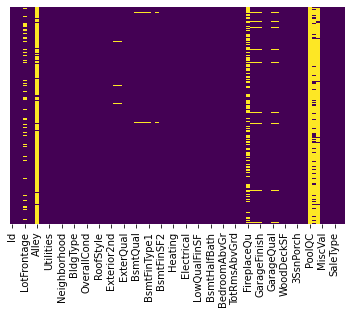

In [3]:
#check null values
df.isnull().sum()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
# veri seti içinde bakmamız gereken çok fazla feature olduğu için, missing value oranı %50 den fazla
# olanları, modeli etkilememesi için silmeliyiz. Örneğin Alley sütununda 1369 tane missing value var
# bu stun tahmin yaparken çok da büyük bir rol oynamayacağı için bu sütun silinebilir.
# lotFrontage sütunundaki missing value miktarı 259, tüm veri setinin %50 sinden daha az miktar olduğu
# için lotFrontage sütunundaki missing valueları doldururuz
# filling missing-values, drop some columns which has too much missing values

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df.drop(['Alley'], axis=1, inplace=True)

df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df.drop(['GarageYrBlt'], axis=1, inplace=True)

df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

df.drop(['PoolQC', 'Fence', 'MiscFeature', 'Id'], axis=1, inplace=True)

df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])


<AxesSubplot:>

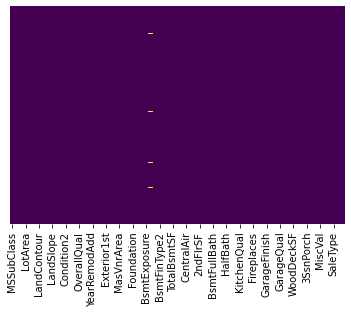

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

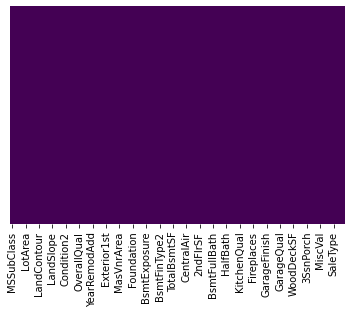

In [6]:
df.dropna(inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# Import label encoder
from sklearn import preprocessing
 # label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df['MSZoning']= label_encoder.fit_transform(df['MSZoning'])
df['Street']= label_encoder.fit_transform(df['Street'])
df['LotShape']= label_encoder.fit_transform(df['LotShape'])
df['LandContour']= label_encoder.fit_transform(df['LandContour'])
df['Utilities']= label_encoder.fit_transform(df['Utilities'])
df['LotConfig']= label_encoder.fit_transform(df['LotConfig'])
df['LandSlope']= label_encoder.fit_transform(df['LandSlope'])
df['Neighborhood']= label_encoder.fit_transform(df['Neighborhood'])
df['Condition2']= label_encoder.fit_transform(df['Condition2'])
df['BldgType']= label_encoder.fit_transform(df['BldgType'])
df['Condition1']= label_encoder.fit_transform(df['Condition1'])
df['HouseStyle']= label_encoder.fit_transform(df['HouseStyle'])
df['SaleType']= label_encoder.fit_transform(df['SaleType'])
df['SaleCondition']= label_encoder.fit_transform(df['SaleCondition'])
df['ExterCond']= label_encoder.fit_transform(df['ExterCond'])
df['ExterQual']= label_encoder.fit_transform(df['ExterQual'])
df['Foundation']= label_encoder.fit_transform(df['Foundation'])
df['BsmtQual']= label_encoder.fit_transform(df['BsmtQual'])
df['BsmtCond']= label_encoder.fit_transform(df['BsmtCond'])
df['BsmtExposure']= label_encoder.fit_transform(df['BsmtExposure'])
df['BsmtFinType1']= label_encoder.fit_transform(df['BsmtFinType1'])
df['BsmtFinType2']= label_encoder.fit_transform(df['BsmtFinType2'])
df['RoofStyle']= label_encoder.fit_transform(df['RoofStyle'])
df['RoofMatl']= label_encoder.fit_transform(df['RoofMatl'])
df['Exterior1st']= label_encoder.fit_transform(df['Exterior1st'])
df['Exterior2nd']= label_encoder.fit_transform(df['Exterior2nd'])
df['MasVnrType']= label_encoder.fit_transform(df['MasVnrType'])
df['Heating']= label_encoder.fit_transform(df['Heating'])
df['HeatingQC']= label_encoder.fit_transform(df['HeatingQC'])
df['CentralAir']= label_encoder.fit_transform(df['CentralAir'])
df['Electrical']= label_encoder.fit_transform(df['Electrical'])
df['KitchenQual']= label_encoder.fit_transform(df['KitchenQual'])
df['Functional']= label_encoder.fit_transform(df['Functional'])
df['FireplaceQu']= label_encoder.fit_transform(df['FireplaceQu'])
df['GarageType']= label_encoder.fit_transform(df['GarageType'])
df['GarageFinish']= label_encoder.fit_transform(df['GarageFinish'])
df['GarageQual']= label_encoder.fit_transform(df['GarageQual'])
df['GarageCond']= label_encoder.fit_transform(df['GarageCond'])
df['PavedDrive']= label_encoder.fit_transform(df['PavedDrive'])


In [8]:
df.to_csv('formulatedtrain.csv',index=False)